In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

df = pd.read_csv('nbatotal.csv')
height = ((df["Ht"].str.split('-')))
inches_tot = np.array(height)
inches = np.array([int(l[0]) for l in inches_tot])
inches_sm = np.array([int(l[1]) for l in inches_tot])
meters = inches*30.48+inches_sm*2.54

#Seperate the total dataframe into two different dataframes 
#with Left handed and right handed

df_left_handed = df[df["Handed"] == 'L']
df_right_handed = df[df["Handed"] == 'R']

k = 0
results = []
gia_plot = []
maximum = max(df["FT%"])
print(maximum)
print("The best FT% shooters in the history of Basket are: \n", 
      df[df["FT%"] == maximum]['Player'])

df_Nash = df[df['RK'] == 25]

print("Steve Nash has attempted",
      int(df_Nash[df_Nash['Handed'] == 'R']['FTA']), 
      "free throws over his entire career")



0.904
The best FT% shooters in the history of Basket are: 
 24      Steve Nash\nashst01
334    Mark Price\pricema01
Name: Player, dtype: object
Steve Nash has attempted 3384 free throws over his entire career


Steve Nash and Mark Prince are the best NBA free throw shooter of all the times. Their percentage is 90.4% and Steve Nash has shoot 3384 free throws.

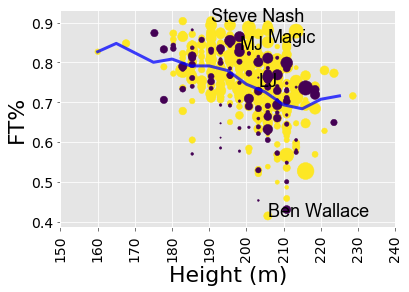

In [8]:
for i in range(160, 250, 5):
    average = 0
    p = 0
    for j in range(1, 507, 1):
        if meters[j] > i and meters[j] < i+5:
            average = average+df["FT%"][j]
            p = p+1
    if p != 0:
        k = k+1
        results.append(i)
        gia_plot.append(average/p)
#        print(i, average/p)
axis_font = {'fontname': 'Arial', 'size': '18'}

#plot the average FT% per height with blue line

plt.plot(results, gia_plot, linewidth=3.0, color='b', alpha=0.75)

#plot the FT% versus the height of the players. 
#Yellow color corresponds to right handed while purple to left handed players. 
#Also the size of the circles corresponds to the Free throw attempt 
#over their entire career

plt.scatter(meters, df["FT%"], df["FTA"]/40, c=df["COLOR"])
plt.text(198.12, 0.835, 'MJ', **axis_font)
plt.text(203.2, 0.742, 'LJ', **axis_font)
plt.text(205.74, 0.414, 'Ben Wallace', **axis_font)
plt.text(205.74, 0.851, 'Magic', **axis_font)
plt.text(190.5, 0.904, 'Steve Nash', **axis_font)
plt.grid(True)
plt.xlabel("Height (m)", fontsize=22, color='black')
plt.ylabel("FT%", fontsize=22, color='black')
xticks = np.arange(150, 250, 10)
plt.xticks(xticks, fontsize=14, rotation='vertical', color='black')
plt.yticks(fontsize=14, color='black')
plt.savefig("trial.eps")
plt.show()


The right handed players can be seen with yellow color while the left handed players are with purple.
It is clear that there is a correlation between the height and the FT% of the players.
Blue line corresponds to the average FT% at each height.